In [1]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np
import pandas as pd
import statistics as stat
import glob
import os


## Setting up font size 
plt.rcParams.update({'font.size': 16})




In [2]:
def readData(data): 
    nElements = 5 

    t = data['time'][:-nElements]
    MI = data['MI'][:-nElements]    

    vel = data['velocity'].rolling(window=500).mean()[:-nElements]
    orientation = data['oriDiff'].rolling(window=300).mean()[:-nElements]


    for x in range(6):
        cpg0.append(data['cpg0_' + str(x+1)][:-nElements] )
        cpg1.append(data['cpg1_' + str(x+1)][:-nElements] )
        tr.append(data['tr_' + str(x+1)][:-nElements])
        cr.append(data['cr_' + str(x+1)][:-nElements])
        fr.append(data['fr_' + str(x+1)][:-nElements])
        g.append(data['g_' + str(x+1)].rolling(window=10).mean()[:-nElements])
        alpha.append(data['weight_' + str(x+1)][:-nElements])
        e.append(data['error_' + str(x+1)][:-nElements])
        pred.append(data['predict_' + str(x+1)][:-nElements])
        f.append(data['sensor_' + str(x+1)][:-nElements])
        f_raw.append(data['sensor_raw_' + str(x+1)][:-nElements])
        rbfn_z.append(data['rbfn_z_' + str(x+1)][:-nElements])
        rbfn_z_lp.append(data['rbfn_z_lp_' + str(x+1)][:-nElements])

        tr_tar.append(data['tr_target_' + str(x+1)][:-nElements])
        cr_tar.append(data['cr_target_' + str(x+1)][:-nElements])
        fr_tar.append(data['fr_target_' + str(x+1)][:-nElements])

def getMaxList(x, y, id, step): 
    sizeX = min([len(item) for item in x])
    maxX = [max([item[i] for item in x]) for i in range(0, sizeX)] 
    sizeY = min([len(item) for item in y])
    maxY = [max([y[j][i] for j in range(id, len(y), step)]) for i in range(0, sizeY)]
    print(sizeX, sizeY)
    return maxX, maxY

def getMeanList(x, y, id, step): 
    sizeT = min([len(item) for item in x])
    listT = [min([item[i] for item in x]) for i in range(0, sizeT)] 
    sizeVel = min([len(item) for item in y])
    meanVel = [stat.mean([y[j][i] for j in range(id, len(y), step)]) for i in range(0, sizeVel)]
    print(len(listT), len(meanVel))
    return listT, meanVel

def getMinList(x, y, id, step): 
    sizeT = min([len(item) for item in x])
    listT = [min([item[i] for item in x]) for i in range(0, sizeT)] 
    sizeVel = min([len(item) for item in y])
    minVel = [min([y[j][i] for j in range(id, len(y), step)]) for i in range(0, sizeVel)]
    print(len(listT), len(minVel))
    return listT, minVel

def partialAvg(data, startPoint):
    sum = 0
    for i in range(startPoint, len(data)):
        sum = sum + data[i]
    return sum/(len(data) - startPoint)

In [3]:
## List of 10 files - Robot with high mass head and adaptive alpha (step mass) new parameters and leg moved back. 

# /home/alexdupond/ai3/v-rep/data/fwdmodel/15-5-11-16-48-data.csv --> Shows tripod gait and tetrapod! 
# /home/alexdupond/ai3/v-rep/data/fwdmodel/15-5-11-22-16-data.csv --> Tripod gait 
list_of_new_files = []

nFiles = 10

In [4]:
## List of 10 files - Robot with high mass head and adaptive alpha (step mass) new parameters

list_of_new_filesV1 = ['/home/alexdupond/ai3/v-rep/data/fwdmodel/15-5-9-55-43-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/14-5-14-41-26-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/14-5-14-39-40-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/14-5-14-37-36-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/14-5-14-35-45-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/14-5-14-33-58-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/14-5-14-32-10-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/14-5-13-30-43-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/14-5-13-20-29-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/14-5-13-6-38-data.csv',
]

## The good model with new uniformly distribution for initialization 

list_of_new_files = ['/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-12-9-23-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-12-6-57-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-12-4-39-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-12-1-51-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-11-59-3-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-11-56-16-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-11-54-2-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-11-51-46-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-11-49-6-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-11-45-53-data.csv'
]

## New test values after changes for rbfn network 

list_of_new_files = ['/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-16-25-42-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-16-20-52-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-55-43-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-52-25-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-48-50-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-35-36-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-33-9-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-30-35-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-27-56-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-24-56-data.csv']

nFiles =10

In [5]:
## List of 10files - Robot with LOW mass head and adaptive alpha (step mass) new parameters

list_of_new_files = ['/home/alexdupond/ai3/v-rep/data/fwdmodel/15-5-11-3-0-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/15-5-11-0-58-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/15-5-10-57-9-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/15-5-10-55-19-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/15-5-10-53-28-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/15-5-10-51-36-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/15-5-10-49-22-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/15-5-10-46-9-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/15-5-10-43-42-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/15-5-10-41-46-data.csv']


## New updated files for low mass 

list_of_new_files= ['/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-17-42-17-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-17-40-2-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-17-37-49-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-17-35-42-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-17-33-33-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-17-31-27-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-17-29-23-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-17-27-9-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-17-24-46-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-16-52-24-data.csv'
]


nFiles = 10

In [6]:
## The good model with new uniformly distribution for initialization 

list_of_new_files = ['/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-12-9-23-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-12-6-57-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-12-4-39-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-12-1-51-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-11-59-3-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-11-56-16-data.csv', #'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-11-54-2-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-11-51-46-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-11-49-6-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/16-5-11-45-53-data.csv']

nFiles = 9


In [7]:
## Get the n newest files
list_of_files = glob.glob('/home/alexdupond/ai3/v-rep/data/fwdmodel/*.csv') # * means all if need specific format then *.csv
nFiles = 1
list_of_new_files = []
for i in range(0,nFiles):
    
    ## Find the latest file
    latest_file = max(list_of_files, key=os.path.getctime)
    print(latest_file)
    # Read the data from the file
    list_of_new_files.append(latest_file) 
    # Delete the latest file from the list of files
    list_of_files = [x for x in list_of_files if not latest_file == x]
    

/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-9-55-33-data.csv


5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898
5898 5898


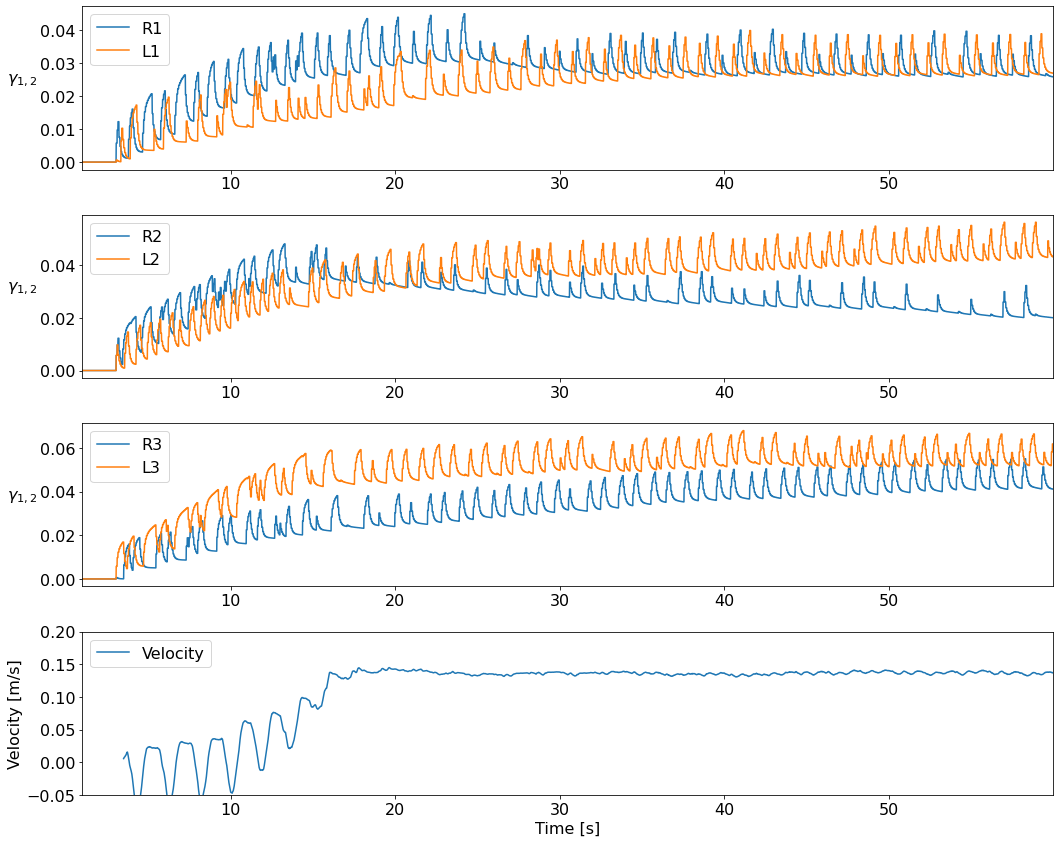

In [8]:

plt.rcParams.update({'font.size': 16})

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

nElements = 5 


t, MI, vel, orientation = ([] for i in range(4))

cpg0, cpg1, tr, cr, fr, g, alpha, tr_tar, cr_tar, fr_tar, rbfn_z, rbfn_z_lp,  e, pred, f, f_raw = ([] for i in range(16))


# Getting the 10 latest files 
for i in range(0,nFiles):
    
    # Read the data from the file
    data = pd.read_csv(list_of_new_files[i]) 
    
    
    
    t.append(data['time'][:-nElements])
    MI.append(data['MI'][:-nElements])
    vel.append(data['velocity'].rolling(window=250).mean()[:-nElements])
    orientation.append(data['oriDiff'].rolling(window=300).mean()[:-nElements])
    
    for x in range(0,6):
        cpg0.append(data['cpg0_' + str(x+1)][:-nElements] )
        cpg1.append(data['cpg1_' + str(x+1)][:-nElements] )
        tr.append(data['tr_' + str(x+1)][:-nElements])
        cr.append(data['cr_' + str(x+1)][:-nElements])
        fr.append(data['fr_' + str(x+1)][:-nElements])
        g.append(data['g_' + str(x+1)].rolling(window=10).mean()[:-nElements])
        alpha.append(data['weight_' + str(x+1)][:-nElements])
        e.append(data['error_' + str(x+1)][:-nElements])
        pred.append(data['predict_' + str(x+1)][:-nElements])
        f.append(data['sensor_' + str(x+1)][:-nElements])
        f_raw.append(data['sensor_raw_' + str(x+1)][:-nElements])
        rbfn_z.append(data['rbfn_z_' + str(x+1)][:-nElements])
        #rbfn_z_lp.append(data['rbfn_z_lp_' + str(x+1)][:-nElements])

        tr_tar.append(data['tr_target_' + str(x+1)][:-nElements])
        cr_tar.append(data['cr_target_' + str(x+1)][:-nElements])
        fr_tar.append(data['fr_target_' + str(x+1)][:-nElements])

for i in range(0,3): 
    x, maxy = getMaxList(t, alpha, i, 6)
    x, meany = getMeanList(t, alpha, i, 6)
    x, miny = getMinList(t, alpha, i, 6)
    
    axes[i].set_xlim(1, x[len(x)-1])


    axes[i].fill_between(x, miny, maxy, alpha=0.1)
    axes[i].plot(x, meany, label = 'R' + str(i+1))
    
    x, maxy = getMaxList(t, alpha, i+3, 6)
    x, meany = getMeanList(t, alpha, i+3, 6)
    x, miny = getMinList(t, alpha, i+3, 6)
    

    axes[i].fill_between(x, miny, maxy, alpha=0.25)
    axes[i].plot(x, meany, label = 'L' + str(i+1))
    
    axes[i].set_xlim(1, x[len(x)-1])

    ## Ploting mean line 
    #avg = partialAvg(meany, int(len(meany)*0.8))
    
    #x1 = [x[0], x[len(x)-1]]
    #y1 = [avg, avg]
    
    #axes.plot(x1, y1, color='black', alpha=0.2)
    #axes[0].plot(x, meany)

    #axes[0].plot(x, miny)
    axes[i].set_ylabel('$γ_{1,2}$      ', rotation=0)
    axes[i].legend(loc=2)

# Plotting speed
x, maxy = getMaxList(t, vel, 0, 1)
x, meany = getMeanList(t, vel, 0, 1)
x, miny = getMinList(t, vel, 0, 1)


axes[3].fill_between(x, miny, maxy, alpha=0.25)
axes[3].plot(x, meany, label = 'Velocity')
axes[3].set_ylabel('Velocity [m/s]')
axes[3].legend(loc=2)
axes[3].set_xlim(1, x[len(x)-1])
axes[3].set_ylim(-0.05, 0.2)

axes[3].set_xlabel('Time [s]')
fig.tight_layout()



[0 1 2]


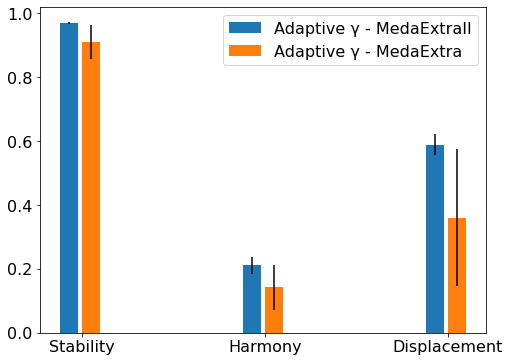

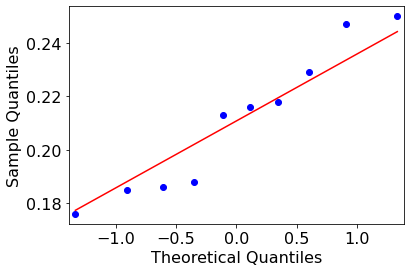

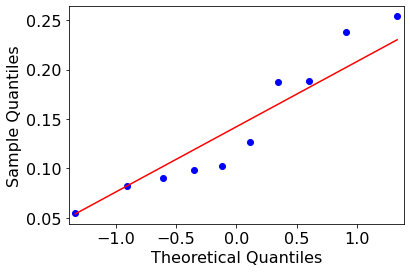

Mean A:  0.21080000000000002 , Mean B:  0.1421
t = 2.9202918759559235
p = 0.009135800096684132
t = 2.9202918759559235
p = 0.009135800096684016


In [90]:
## Comparing preformance between models 

from statistics import mean, stdev

harmony1 = [0.218, 0.247, 0.229, 0.216, 0.185, 0.25, 0.213, 0.188, 0.176, 0.186] # Adaptive model high mass 
harmony2 = [0.102, 0.082, 0.254, 0.09, 0.187, 0.098, 0.188, 0.127, 0.238, 0.055] # Adaptive model low mass 
harmony3 = [0.124, 0.104, 0.163, 0.153, 0.109, 0.146, 0.134, 0.078, 0.116, 0.097] # Non adaptive 0.1
harmony4 = [0.153, 0.162, 0.24, 0.13, 0.193, 0.098, 0.183, 0.171, 0.152, 0.184] # Non adaptive 0.05


stability1 = [0.97, 0.971, 0.966, 0.97, 0.968, 0.972, 0.961, 0.969, 0.972, 0.973]
stability2 = [0.965, 0.876, 0.968, 0.875, 0.967, 0.853, 0.943, 0.879, 0.958, 0.831]
stability3 = [0.905, 0.921, 0.916, 0.802, 0.882, 0.952, 0.953, 0.93, 0.807, 0.952, 0.943]
stability4 = [0.944, 0.965, 0.963, 0.913, 0.966, 0.929, 0.968, 0.966, 0.959, 0.971]

displacement1 = [0.572, 0.623, 0.531, 0.613, 0.646, 0.574, 0.57, 0.6, 0.564, 0.6]
displacement2 = [0.523, 0.323, 0.555, 0.114, 0.49, 0.35, 0.465, 0.042, 0.65, 0.09]
displacement3 = [0.426, 0.305, 0.31, 0.22, 0.415, 0.54, 0.57, 0.3, 0.399, 0.53]
displacement4 = [0.546, 0.553, 0.567, 0.45, 0.61, 0.435, 0.605, 0.584, 0.587, 0.526]


N = 3
m1Means = (mean(stability1), mean(harmony1), mean(displacement1))
m1Std = (stdev(stability1), stdev(harmony1), stdev(displacement1))

fig, ax = plt.subplots(figsize=(8, 6))

ind = np.arange(N)    # the x locations for the groups
print(ind)
width = 0.1        # the width of the bars
dist = width * 1.2
p1 = ax.bar(ind - dist/2, m1Means, width, bottom=0, yerr=m1Std)


m2Means = (mean(stability2), mean(harmony2), mean(displacement2)) 
m2Std = (stdev(stability2), stdev(harmony2), stdev(displacement2))
p2 = ax.bar(ind + dist/2, m2Means, width, bottom=0, yerr=m2Std)



ax.set_xticks(ind + width / 10)
ax.set_xticklabels(('Stability', 'Harmony', 'Displacement'))

ax.legend((p1[0], p2[0]), ('Adaptive γ - MedaExtraII', 'Adaptive γ - MedaExtra'))
ax.autoscale_view()

plt.show()


## Statistics
## Import the packages
from statsmodels.graphics.gofplots import qqplot
from scipy import stats


## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.asarray(harmony1) #np.random.randn(N) + 0.1
#Gaussian distributed data with with mean = 0 and var = 1
b = np.asarray(harmony2) #np.random.randn(N)

qqplot(a, line='s')
qqplot(b, line='s')
#plt.hist(b)
#plt.hist(b)

plt.show()

## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)



## Calculate the t-statistics
print("Mean A: ", a.mean(), ", Mean B: ", b.mean())
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))



## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

[0 1 2]


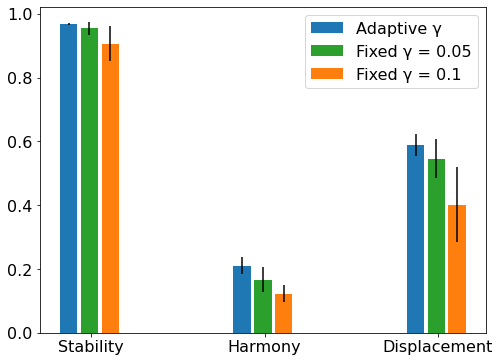

In [86]:
## Comparing preformance between models 

from statistics import mean, stdev

harmony1 = [0.218, 0.247, 0.229, 0.216, 0.185, 0.25, 0.213, 0.188, 0.176, 0.186] # Adaptive model high mass 
harmony2 = [0.102, 0.082, 0.254, 0.09, 0.187, 0.098, 0.188, 0.127, 0.238, 0.055] # Adaptive model low mass 
harmony3 = [0.124, 0.104, 0.163, 0.153, 0.109, 0.146, 0.134, 0.078, 0.116, 0.097] # Non adaptive 0.1
harmony4 = [0.153, 0.162, 0.24, 0.13, 0.193, 0.098, 0.183, 0.171, 0.152, 0.184] # Non adaptive 0.05


stability1 = [0.97, 0.971, 0.966, 0.97, 0.968, 0.972, 0.961, 0.969, 0.972, 0.973]
stability2 = [0.965, 0.876, 0.968, 0.875, 0.967, 0.853, 0.943, 0.879, 0.958, 0.831]
stability3 = [0.905, 0.921, 0.916, 0.802, 0.882, 0.952, 0.953, 0.93, 0.807, 0.952, 0.943]
stability4 = [0.944, 0.965, 0.963, 0.913, 0.966, 0.929, 0.968, 0.966, 0.959, 0.971]

displacement1 = [0.572, 0.623, 0.531, 0.613, 0.646, 0.574, 0.57, 0.6, 0.564, 0.6]
displacement2 = [0.523, 0.323, 0.555, 0.114, 0.49, 0.35, 0.465, 0.042, 0.65, 0.09]
displacement3 = [0.426, 0.305, 0.31, 0.22, 0.415, 0.54, 0.57, 0.3, 0.399, 0.53]
displacement4 = [0.546, 0.553, 0.567, 0.45, 0.61, 0.435, 0.605, 0.584, 0.587, 0.526]


N = 3
m1Means = (mean(stability1), mean(harmony1), mean(displacement1))
m1Std = (stdev(stability1), stdev(harmony1), stdev(displacement1))

fig, ax = plt.subplots(figsize=(8, 6))

ind = np.arange(N)    # the x locations for the groups
print(ind)
width = 0.1        # the width of the bars
dist = width * 1.2
p1 = ax.bar(ind - dist, m1Means, width, bottom=0, yerr=m1Std)


m3Means = (mean(stability3), mean(harmony3), mean(displacement3))
m3Std = (stdev(stability3), stdev(harmony3), stdev(displacement3))
p3 = ax.bar(ind + dist, m3Means, width, bottom=0, yerr=m3Std)

m4Means = (mean(stability4), mean(harmony4), mean(displacement4))
m4Std = (stdev(stability4), stdev(harmony4), stdev(displacement4))
p2 = ax.bar(ind, m4Means, width, bottom=0, yerr=m4Std)

ax.set_xticks(ind + width / 10)
ax.set_xticklabels(('Stability', 'Harmony', 'Displacement'))

ax.legend((p1[0], p2[0], p3[0]), ('Adaptive γ', 'Fixed γ = 0.05', 'Fixed γ = 0.1'))
ax.autoscale_view()

plt.show()


/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-13-11-26-data.csv
/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-13-9-31-data.csv
/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-13-7-33-data.csv
/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-54-42-data.csv
/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-52-49-data.csv
/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-50-48-data.csv
/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-46-33-data.csv
/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-44-38-data.csv
/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-42-43-data.csv
/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-40-46-data.csv


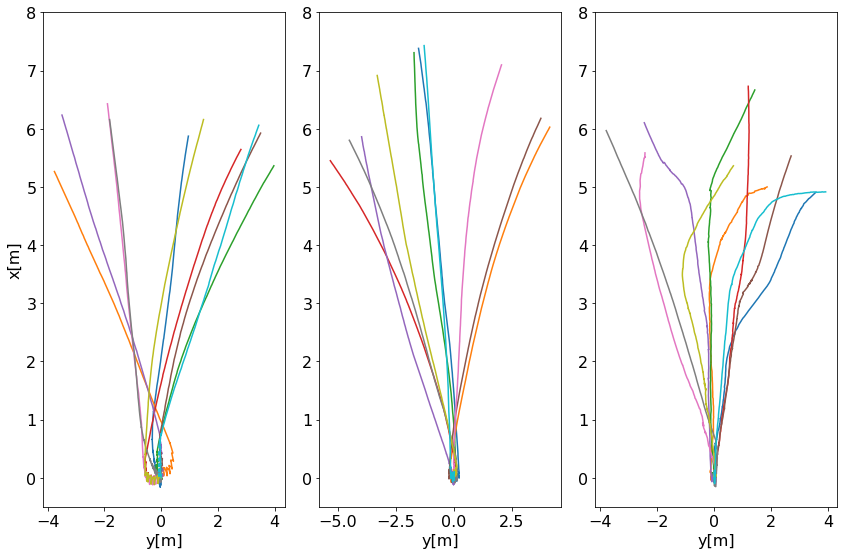

In [63]:
## Get the n newest files
list_of_files = glob.glob('/home/alexdupond/ai3/v-rep/data/fwdmodel/*.csv') # * means all if need specific format then *.csv
nFiles = 10
list_of_new_files = []
for i in range(0,nFiles):
    
    ## Find the latest file
    latest_file = max(list_of_files, key=os.path.getctime)
    print(latest_file)
    # Read the data from the file
    list_of_new_files.append(latest_file) 
    # Delete the latest file from the list of files
    list_of_files = [x for x in list_of_files if not latest_file == x]
    

# Adaptive model 
list_of_new_files1 = ['/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-16-25-42-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-16-20-52-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-55-43-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-52-25-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-48-50-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-35-36-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-33-9-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-30-35-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-27-56-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/23-5-15-24-56-data.csv']

# Fixed model with 0.05 

list_of_new_files2 = ['/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-36-29-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-38-32-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-40-46-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-42-43-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-44-38-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-46-33-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-50-48-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-52-49-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-54-42-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-13-9-31-data.csv']

# Fixed model with 0.1 

list_of_new_files3 = ['/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-3-58-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-5-47-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-7-37-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-13-11-26-data.csv', #'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-9-25-data.csv', # bad
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-11-18-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-23-44-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-26-12-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-28-27-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-32-40-data.csv',
'/home/alexdupond/ai3/v-rep/data/fwdmodel/24-5-12-34-36-data.csv']


list_of_new_files = []
list_of_new_files.append(list_of_new_files1)
list_of_new_files.append(list_of_new_files2)
list_of_new_files.append(list_of_new_files3)

plt.rcParams.update({'font.size': 16})

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

nElements = 5 


t, MI, x_pos, y_pos = ([] for i in range(4))

for axe, files in zip(axes, list_of_new_files): 
    # Getting the 10 latest files 
    for i in range(0,nFiles):

        # Read the data from the file 1 
        data = pd.read_csv(files[i])     

        t = data['time'][:-nElements]
        x_pos = data['body_x'][:-nElements]-data['body_x'][:-nElements][0]
        y_pos = data['body_y'][:-nElements]-data['body_y'][:-nElements][0]

        axe.plot(y_pos, x_pos)
        axe.set_ylim(-0.5, 8)
        


    axe.set_xlabel("y[m]")
axes[0].set_ylabel("x[m]")

fig.tight_layout()

